In [5]:
import os
import numpy as np


In [41]:
data_directory = './exercise_2_data'
image_num = '01'
image_name = 'IMG_9939.npy'


img_dir = os.path.join(data_directory, image_num, image_name)
array = np.load(img_dir)
print('Loaded array of size', array.shape)
print('The pens, from top to bottom, are red, green and blue')

    

Loaded array of size (4014, 6020)
The pens, from top to bottom, are red, green and blue


In [42]:
np.max(array)

8385

In [43]:
np.min(array)


2095

In [44]:
array_flatten = array.reshape(1, -1)

In [45]:
array_flatten.shape

(1, 24164280)

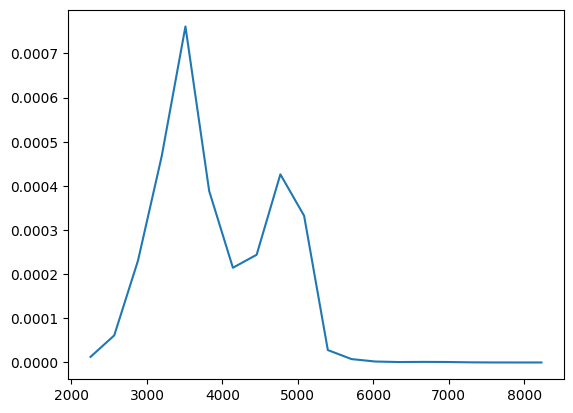

In [46]:
import matplotlib.pyplot as plt


nbins = 20

n, bins = np.histogram(array_flatten, nbins, density=1)
pdfx = np.zeros(n.size)
pdfy = np.zeros(n.size)
for k in range(n.size):
    pdfx[k] = 0.5*(bins[k]+bins[k+1])
    pdfy[k] = n[k]

plt.plot(pdfx, pdfy)

In [34]:
array[array > 4500] = 1
array[array < 4501] = 0

In [53]:
green_mask = (array > 4500).astype(int)
red_blue_mask = (array <= 4500).astype(int)


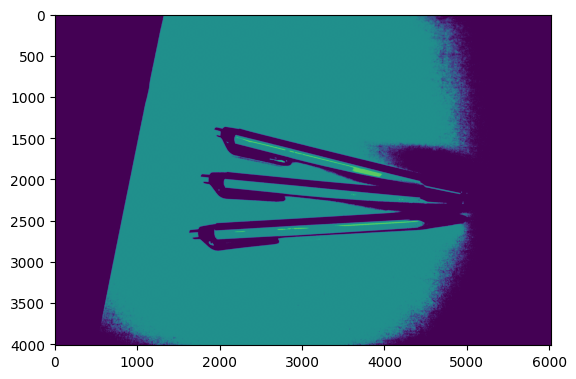

In [52]:
plt.imshow(green_mask)

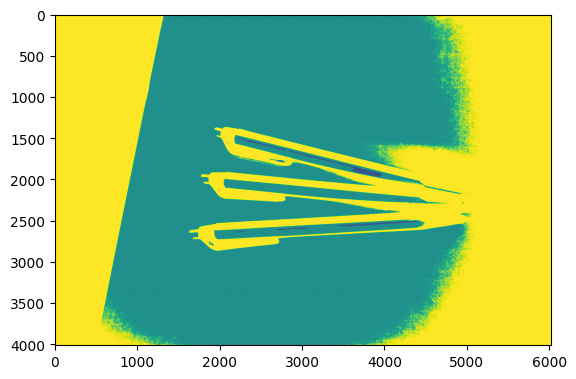

In [54]:
plt.imshow(red_blue_mask)

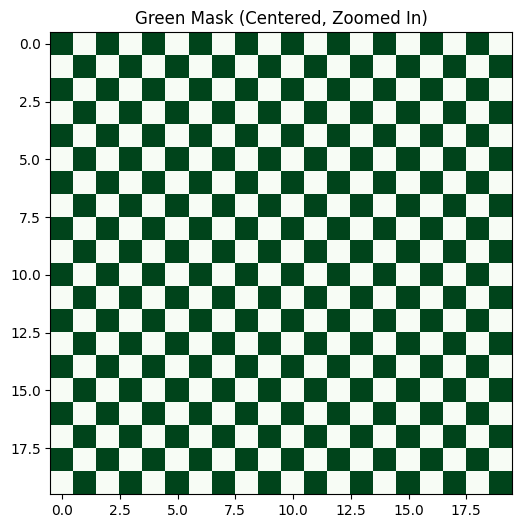

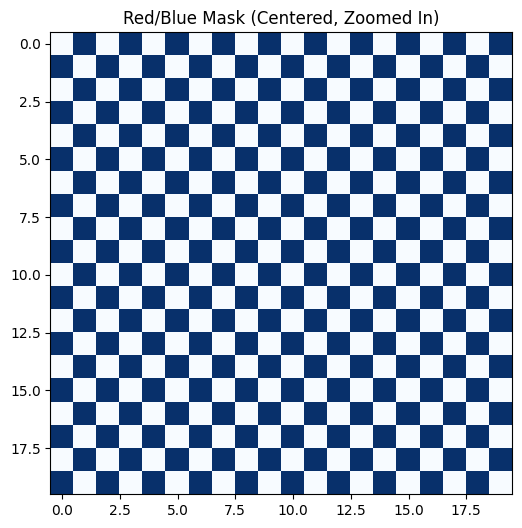

In [63]:
# Define the region size for visualization (e.g., 30x30)
region_size = 20

# Calculate the center coordinates of the array
center_x, center_y = array.shape[0] // 3, array.shape[1] // 3

# Extract a subsection centered on the middle of the image
half_region = region_size // 2
green_region = green_mask[center_x - half_region:center_x + half_region,
                          center_y - half_region:center_y + half_region]
red_blue_region = red_blue_mask[center_x - half_region:center_x + half_region,
                                center_y - half_region:center_y + half_region]

# Plot the green mask
plt.figure(figsize=(6, 6))
plt.title("Green Mask (Centered, Zoomed In)")
plt.imshow(green_region, cmap="Greens", interpolation="none")
plt.show()

# Plot the red/blue mask
plt.figure(figsize=(6, 6))
plt.title("Red/Blue Mask (Centered, Zoomed In)")
plt.imshow(red_blue_region, cmap="Blues", interpolation="none")
plt.show()